In [47]:
import plotly.express as px
import pandas as pd
from IPython.display import display, HTML

In [151]:
data = pd.read_csv(r'mprofile_20230807130710.dat', sep="\t")
display(data.tail())


data_dict = data.to_dict().values()
data_dict = list(data_dict)[0]

first_seconds = None

seconds_list = []
mem_list = []

for value in data_dict.values():
    _, mem, seconds = value.split(" ")
    if first_seconds is None:
        first_seconds = float(seconds)
    mem_list.append(float(mem))
    seconds_list.append(float(seconds) - first_seconds)

df = pd.DataFrame({"time": seconds_list, "memory": mem_list})
display(df.tail())

fig = px.line(
    df,
    x = "time",
    y = "memory",
    title = "Memory usage over time (Streamlit App)",
    template = "ggplot2",
).update_layout(
    hovermode = "x unified",
    margin_t = 140,
    title_y = 0.94,
    yaxis_range = [0, 1.4 * max(mem_list)],
    height = 600,
    width = 1200,
)
for x, text in [
    (480, "open<br>Browse<br>Examples"),
    (705, "reopen<br>Browse<br>Examples"),
    (1510, "reopen<br>Browse<br>Examples"),
    ((1540, 1710), "reopen<br>Browse<br>Examples,<br>navigating"),
    (1905, "toggle<br>page x3,<br>then<br>leave"),
    (2070, "open<br>CSPA<br>page"),
    ((2210, 2370), "use<br>OV & QK<br>pages"),
    (2510, "open<br>Test Your<br>Own Ex."),
    ((2710, 2780), "use<br>Test Your<br>Own Ex."),
]:
    if isinstance(x, int):
        fig.add_vline(
            x = x,
            annotation_text = text,
            annotation_position = "top",
            line_color = "black",
            xanchor = "right",
            line_dash = "dash",
            line_width = 1,
            opacity = 1.0,
        )
    elif isinstance(x, tuple):
        fig.add_vrect(
            x0 = x[0],
            x1 = x[1],
            annotation_text = "<br>".join(text.split(" ")),
            annotation_position = "top",
            fillcolor = "orange",
            opacity = 0.3,
            line_width = 0,
        )
fig.show()

,CMDLINE 21880
28345,MEM 1059.324219 1691413114.0582
28346,MEM 1059.324219 1691413114.1670
28347,MEM 1059.324219 1691413114.2756
28348,MEM 1059.324219 1691413114.3844
28349,MEM 1059.324219 1691413114.4931


,time,memory
28345,3083.3584,1059.324219
28346,3083.4672,1059.324219
28347,3083.5758,1059.324219
28348,3083.6846,1059.324219
28349,3083.7933,1059.324219


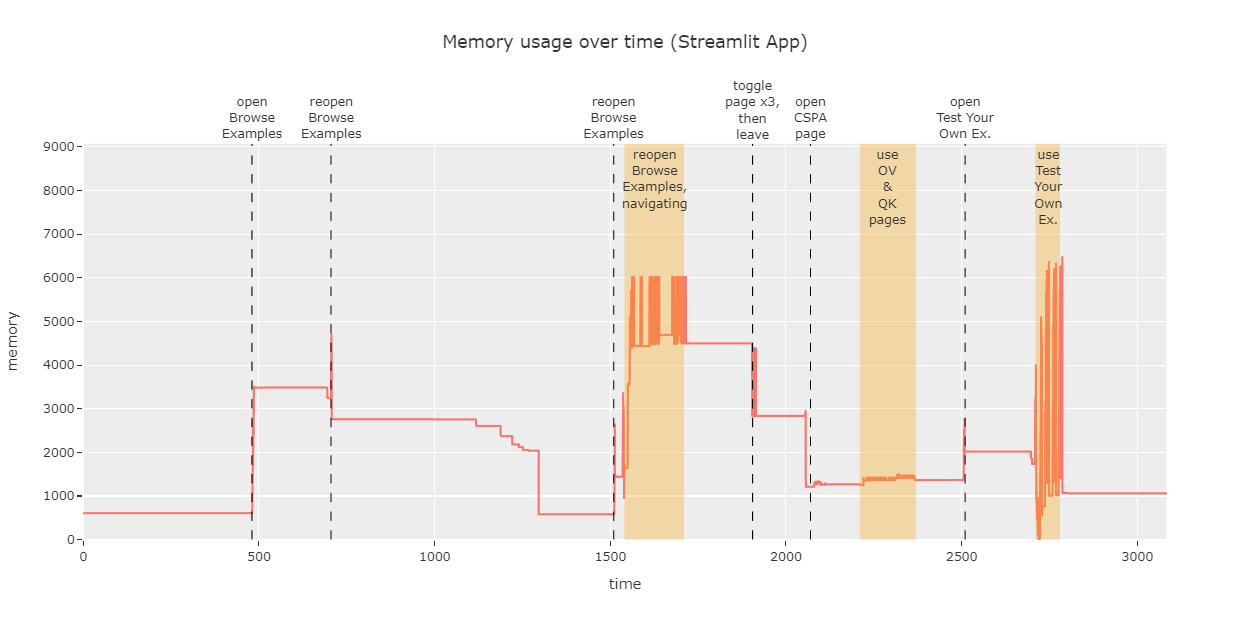